In [1]:
#!pip install scikit-learn==0.23.2

In [2]:
import numpy as np
import pandas as pd  
import os
import warnings
warnings.simplefilter('ignore')

import matplotlib
import matplotlib.pyplot as pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm

print('Version Pandas', pd.__version__)
print('Version Numpy', np.__version__)
print('Version Matplotlib', matplotlib.__version__)
print('Version Seaborn', sns.__version__)

os.listdir('../input/creditcard/')

Version Pandas 1.2.3
Version Numpy 1.19.5
Version Matplotlib 3.4.1
Version Seaborn 0.11.1


['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
BASE_DIR = '../input/creditcard/'
train = pd.read_csv(BASE_DIR + 'train.csv')
test = pd.read_csv(BASE_DIR + 'test.csv')
sample_submission = pd.read_csv(BASE_DIR + 'sample_submission.csv')

#all_df=pd.concat([train_df, test_df]).reset_index(drop=True)

print('Rows and Columns in train dataset:', train.shape)
print('Rows and Columns in test dataset:', test.shape)

Rows and Columns in train dataset: (26457, 20)
Rows and Columns in test dataset: (10000, 19)


In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [6]:
sample_submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


# 1. Data Preprocessing

## 1-1. DataSet & Null data check

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [9]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [10]:
drop_list=['index','FLAG_MOBIL']

train=train.drop(drop_list, axis=1)
test=test.drop(drop_list, axis=1)

In [11]:
SEED=2021
N_estimators=1000

## 1-2. 전처리

## 1-3. Encoding

In [12]:
## child_num
train['child_num']=np.where(train['child_num'] >= 1,
                             '0', # 0이면 자녀가 없음
                             '1') # 1이상이면 자녀가 있음으로 나뉨
test['child_num']=np.where(test['child_num'] >= 1,'0','1')

## income_total

train['income_total']= round(train['income_total']/10000)
test['income_total']= round(test['income_total']/10000)

train['income_total'] = pd.cut(train['income_total'], bins=[0,7,9,12,14,16,19,22,25,28,200]
                               , labels=['0', '1', '2', '3', '4','5', '6', '7', '8', '9'])
test['income_total'] = pd.cut(test['income_total'], bins=[0,7,9,12,14,16,19,22,25,28,200]
                               , labels=['0', '1', '2', '3', '4','5', '6', '7', '8', '9'])

#train['income_total'] = train['income_total'].map(lambda i: np.log(i) if i > 0 else 0)
#test['income_total'] = test['income_total'].map(lambda i: np.log(i) if i > 0 else 0)

## days_birth
train['age']= -round(train['DAYS_BIRTH']/365)
test['age']= -round(test['DAYS_BIRTH']/365)

train=train.drop('DAYS_BIRTH', axis=1)
test=test.drop('DAYS_BIRTH', axis=1)

## days_employed
train['year_employed']= np.ceil(-train['DAYS_EMPLOYED']/365)
test['year_employed']= np.ceil(-test['DAYS_EMPLOYED']/365)

train['year_employed'] = train['year_employed'].replace(-1000.0,0) #365243인 변수들 모두 0으로 변경
test['year_employed'] = test['year_employed'].replace(-1000.0,0) #365243인 변수들 모두 0으로 변경

train=train.drop('DAYS_EMPLOYED', axis=1)
test=test.drop('DAYS_EMPLOYED', axis=1)

## begin_month

train['begin_year']= -round(train['begin_month']/12)
test['begin_year']= -round(test['begin_month']/12)
train=train.drop('begin_month', axis=1)
test=test.drop('begin_month', axis=1)

#train['begin_month']= -train['begin_month']
#test['begin_month']= -test['begin_month']

## occyp_type
train['occyp_type'] = train['occyp_type'].fillna('X')
test['occyp_type'] = test['occyp_type'].fillna('X')

In [13]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,credit,age,year_employed,begin_year
0,F,N,N,1,6,Commercial associate,Higher education,Married,Municipal apartment,0,0,0,X,2.0,1.0,38.0,13.0,0.0
1,F,N,Y,0,7,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,Laborers,3.0,1.0,31.0,5.0,0.0
2,M,Y,Y,1,9,Working,Higher education,Married,House / apartment,0,1,0,Managers,2.0,2.0,52.0,13.0,2.0
3,F,N,Y,1,6,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,Sales staff,2.0,0.0,41.0,6.0,3.0
4,F,Y,Y,1,4,State servant,Higher education,Married,House / apartment,0,0,0,Managers,2.0,2.0,41.0,6.0,2.0


In [14]:
drop_list2=['work_phone','phone','email','credit']
drop_list2_test=['work_phone','phone','email']

test=test.drop(drop_list2_test, axis=1)

X=train.drop(drop_list2, axis=1)
y=train[['credit']]

# 'credit'만 drop
#X=train.drop('credit', axis=1)
#y=train[['credit']]

print(X.shape, y.shape, test.shape)

(26457, 14) (26457, 1) (10000, 14)


In [15]:
from sklearn import preprocessing
import category_encoders as utill

label_encoding=['reality','income_total','family_size']
onehot_encoding=['car','gender','child_num']

hash_encoding=['family_type','house_type','edu_type','occyp_type']
binary_encoding=['year_employed','begin_year']

def lb_encoding(v):
    lb_encoder=preprocessing.LabelEncoder()
    train[v]=lb_encoder.fit_transform(train[v])
    test[v]=lb_encoder.transform(test[v])

In [16]:
hash_encoder= utill.HashingEncoder(cols=['family_type','house_type','edu_type','occyp_type','income_type'])
X=hash_encoder.fit_transform(X)
test=hash_encoder.transform(test)

In [17]:
binary_encoder= utill.BinaryEncoder(cols=['year_employed','begin_year'])
X=binary_encoder.fit_transform(X)
test=binary_encoder.transform(test)

In [20]:
for i in range(len(label_encoding)):
    lb_encoding(label_encoding[i])

train_onehot=pd.get_dummies(train[['car','gender','child_num']])
X = pd.concat([X,train_onehot], axis=1)
X=X.drop(['car','gender','child_num'],axis=1)

test_onehot=pd.get_dummies(test[['car','gender','child_num']])
test = pd.concat([test,test_onehot], axis=1)
test=test.drop(['car','gender','child_num'],axis=1)

In [23]:
X=X.drop(['reality','income_total','family_size'],axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            26457 non-null  int64  
 1   col_1            26457 non-null  int64  
 2   col_2            26457 non-null  int64  
 3   col_3            26457 non-null  int64  
 4   col_4            26457 non-null  int64  
 5   col_5            26457 non-null  int64  
 6   col_6            26457 non-null  int64  
 7   col_7            26457 non-null  int64  
 8   age              26457 non-null  float64
 9   year_employed_0  26457 non-null  int64  
 10  year_employed_1  26457 non-null  int64  
 11  year_employed_2  26457 non-null  int64  
 12  year_employed_3  26457 non-null  int64  
 13  year_employed_4  26457 non-null  int64  
 14  year_employed_5  26457 non-null  int64  
 15  year_employed_6  26457 non-null  int64  
 16  begin_year_0     26457 non-null  int64  
 17  begin_year_1

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  object 
 4   income_total   26457 non-null  int64  
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   work_phone     26457 non-null  int64  
 10  phone          26457 non-null  int64  
 11  email          26457 non-null  int64  
 12  occyp_type     26457 non-null  object 
 13  family_size    26457 non-null  int64  
 14  credit         26457 non-null  float64
 15  age            26457 non-null  float64
 16  year_employed  26457 non-null  float64
 17  begin_year     26457 non-null  float64
dtypes: flo

In [27]:
train=pd.concat([X,train[['credit','reality','income_total','family_size']]],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            26457 non-null  int64  
 1   col_1            26457 non-null  int64  
 2   col_2            26457 non-null  int64  
 3   col_3            26457 non-null  int64  
 4   col_4            26457 non-null  int64  
 5   col_5            26457 non-null  int64  
 6   col_6            26457 non-null  int64  
 7   col_7            26457 non-null  int64  
 8   age              26457 non-null  float64
 9   year_employed_0  26457 non-null  int64  
 10  year_employed_1  26457 non-null  int64  
 11  year_employed_2  26457 non-null  int64  
 12  year_employed_3  26457 non-null  int64  
 13  year_employed_4  26457 non-null  int64  
 14  year_employed_5  26457 non-null  int64  
 15  year_employed_6  26457 non-null  int64  
 16  begin_year_0     26457 non-null  int64  
 17  begin_year_1

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            10000 non-null  int64  
 1   col_1            10000 non-null  int64  
 2   col_2            10000 non-null  int64  
 3   col_3            10000 non-null  int64  
 4   col_4            10000 non-null  int64  
 5   col_5            10000 non-null  int64  
 6   col_6            10000 non-null  int64  
 7   col_7            10000 non-null  int64  
 8   reality          10000 non-null  int64  
 9   income_total     10000 non-null  int64  
 10  family_size      10000 non-null  int64  
 11  age              10000 non-null  float64
 12  year_employed_0  10000 non-null  int64  
 13  year_employed_1  10000 non-null  int64  
 14  year_employed_2  10000 non-null  int64  
 15  year_employed_3  10000 non-null  int64  
 16  year_employed_4  10000 non-null  int64  
 17  year_employed

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            26457 non-null  int64  
 1   col_1            26457 non-null  int64  
 2   col_2            26457 non-null  int64  
 3   col_3            26457 non-null  int64  
 4   col_4            26457 non-null  int64  
 5   col_5            26457 non-null  int64  
 6   col_6            26457 non-null  int64  
 7   col_7            26457 non-null  int64  
 8   age              26457 non-null  float64
 9   year_employed_0  26457 non-null  int64  
 10  year_employed_1  26457 non-null  int64  
 11  year_employed_2  26457 non-null  int64  
 12  year_employed_3  26457 non-null  int64  
 13  year_employed_4  26457 non-null  int64  
 14  year_employed_5  26457 non-null  int64  
 15  year_employed_6  26457 non-null  int64  
 16  begin_year_0     26457 non-null  int64  
 17  begin_year_1

## 2. OLS 다중회귀분석
> *references*
> - [https://todayisbetterthanyesterday.tistory.com/8](https://todayisbetterthanyesterday.tistory.com/8)

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def credit_set(X, y):
    x_data= X
    target = y
    
    x_data_=sm.add_constant(x_data, has_constant="add")
    
    multi_model= sm.OLS(target, x_data)
    fitted_multi_model= multi_model.fit()
    print(fitted_multi_model.summary())

In [27]:
train.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'gender_0', 'gender_1', 'car_0', 'car_1', 'child_num_0', 'child_num_1',
       'income_type_0', 'income_type_1', 'income_type_2', 'income_type_3',
       'edu_type_0', 'edu_type_1', 'edu_type_2', 'edu_type_3', 'family_type_0',
       'family_type_1', 'family_type_2', 'family_type_3', 'house_type_0',
       'house_type_1', 'house_type_2', 'house_type_3', 'work_phone_0',
       'work_phone_1', 'phone_0', 'phone_1', 'email_0', 'email_1', 'credit',
       'reality', 'occyp_type', 'family_size', 'begin_year'],
      dtype='object')

In [30]:
# log
x_data = train[['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'gender_0', 'gender_1', 'car_0', 'car_1', 'child_num_0', 'child_num_1',
       'income_type_0', 'income_type_1', 'income_type_2', 'income_type_3',
       'edu_type_0', 'edu_type_1', 'edu_type_2', 'edu_type_3', 'family_type_0',
       'family_type_1', 'family_type_2', 'family_type_3', 'house_type_0',
       'house_type_1', 'house_type_2', 'house_type_3', 'work_phone_0',
       'work_phone_1', 'phone_0', 'phone_1', 'email_0', 'email_1',
       'reality', 'occyp_type', 'family_size', 'begin_year']]
target = train[['credit']]

In [28]:
#x_data = train[['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
#       'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email',
#       'occyp_type', 'family_size', 'age', 'year_employed', 'begin_year']]
#target = train[['credit']]

In [31]:
for i in range(17):
    
    x_data_=pd.DataFrame(x_data.iloc[:,i])
    print(f'<<<<<<<<<<<<<<<<<<<<<< {x_data_.columns}  >>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    #target = train[['credit']]
    print(credit_set(x_data_, target))
    print('\n')

<<<<<<<<<<<<<<<<<<<<<< Index(['col_0'], dtype='object')  >>>>>>>>>>>>>>>>>>>>>>>>>>>>
                                 OLS Regression Results                                
Dep. Variable:                 credit   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              8675.
Date:                Wed, 12 May 2021   Prob (F-statistic):                        0.00
Time:                        05:22:35   Log-Likelihood:                         -47420.
No. Observations:               26457   AIC:                                  9.484e+04
Df Residuals:                   26456   BIC:                                  9.485e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err  

## 3. Modeling

### 3-1. data split

In [29]:
X=train.drop('credit', axis=1)
y=train[['credit']]

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            26457 non-null  int64  
 1   col_1            26457 non-null  int64  
 2   col_2            26457 non-null  int64  
 3   col_3            26457 non-null  int64  
 4   col_4            26457 non-null  int64  
 5   col_5            26457 non-null  int64  
 6   col_6            26457 non-null  int64  
 7   col_7            26457 non-null  int64  
 8   age              26457 non-null  float64
 9   year_employed_0  26457 non-null  int64  
 10  year_employed_1  26457 non-null  int64  
 11  year_employed_2  26457 non-null  int64  
 12  year_employed_3  26457 non-null  int64  
 13  year_employed_4  26457 non-null  int64  
 14  year_employed_5  26457 non-null  int64  
 15  year_employed_6  26457 non-null  int64  
 16  begin_year_0     26457 non-null  int64  
 17  begin_year_1

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   col_0            10000 non-null  int64  
 1   col_1            10000 non-null  int64  
 2   col_2            10000 non-null  int64  
 3   col_3            10000 non-null  int64  
 4   col_4            10000 non-null  int64  
 5   col_5            10000 non-null  int64  
 6   col_6            10000 non-null  int64  
 7   col_7            10000 non-null  int64  
 8   reality          10000 non-null  int64  
 9   income_total     10000 non-null  int64  
 10  family_size      10000 non-null  int64  
 11  age              10000 non-null  float64
 12  year_employed_0  10000 non-null  int64  
 13  year_employed_1  10000 non-null  int64  
 14  year_employed_2  10000 non-null  int64  
 15  year_employed_3  10000 non-null  int64  
 16  year_employed_4  10000 non-null  int64  
 17  year_employed

================================

# PYCARET

In [28]:
#!pip install pycaret

In [28]:
#from pycaret.utils import version
#import sklearn

#print("pycaret version:", version())
#print("sklearn version:", sklearn.__version__)
#from pycaret.classification import *
#from sklearn.metrics import log_loss

In [28]:
#category_caret={'Sex':['0','1'],'Pclass':['0','1','2'], 'Embarked':['0','1','2','3']}

#setup(data = train, 
#      target = 'credit',
      #ordinal_features= category_caret,
      #numeric_imputation = 'Age','SibSp','Name','Ticket','Fare',
#      fold=5,
#      silent = True,
#      session_id=1,
      #data_split_shuffle=True
      #fold_shuffle=True
#     )

In [31]:
#add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

In [32]:
#best_model = compare_models(sort = 'logloss', n_select = 4)

======================================

### 3-2 Hyperparameter tuning - random search

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()

#X_train, X_val, y_train, y_val = train_test_split(X, y, 
#                                                    stratify=y, test_size=0.25,
#                                                   random_state = SEED)

loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

lgb_params = {
    'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

lgb_random = RandomizedSearchCV(estimator=lgbm,
            param_distributions=lgb_params,
            cv=4, n_iter=50,
            scoring = 'roc_auc',n_jobs = 4,
            verbose = True, 
            random_state=SEED)

lgb_random.fit(X,y)
lgb_random.best_params_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


KeyboardInterrupt: 

### 3-3. Sampling
- SMOTE - Over Sampling
- SMOTE + ENN - Combine Sampling
- SMOTE + TOMEK - Combine Sampling

In [32]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

def smote_sampling(X,y):
    sm= SMOTE(random_state=SEED)
    
    X_res_sm, y_res_sm = sm.fit_resample(X,y)
    
    print('Before Smote Sampling, the shape of train_x:{}'.format(X.shape))
    print('After Smote Sampling, the shape of train_x:{}\n'.format(X_res_sm.shape))
    print('After Smote Sampling, the distribution of label values: {}'.format(y_res_sm.value_counts()))
    
    return X_res_sm, y_res_sm

def smote_enn_sampling(X,y):
    sm_enn=SMOTEENN(random_state=SEED)
    X_res_smenn, y_res_smenn = sm_enn.fit_resample(X,y)

    print('Before SmoteENN Sampling, the shape of train_x:{}'.format(X.shape))
    print('After SmoteENN Sampling, the shape of train_x:{}\n'.format(X_res_smenn.shape))
    print('After SmoteENN Sampling, the distribution of label values: {}'.format(y_res_smenn.value_counts()))
    
    return X_res_smenn, y_res_smenn

def smote_tomek_sampling(X,y):
    sm_tk=SMOTETomek(random_state=SEED)
    X_res_smtk, y_res_smtk = sm_tk.fit_resample(X,y)

    print('Before SmoteTOMEK Sampling, the shape of train_x:{}'.format(X.shape))
    print('After SmoteTOMEK Sampling, the shape of train_x:{}\n'.format(X_res_smtk.shape))
    print('After SmoteTOMEK Sampling, the distribution of label values: {}'.format(y_res_smtk.value_counts()))
    
    return X_res_smtk, y_res_smtk
    

In [33]:
X_res_sm, y_res_sm= smote_sampling(X,y)
print(X_res_sm.shape, y_res_sm.shape)

X_res_smenn, y_res_smenn= smote_enn_sampling(X,y)
print(X_res_smenn.shape, y_res_smenn.shape)

X_res_smtk, y_res_smtk= smote_tomek_sampling(X,y)
print(X_res_smtk.shape, y_res_smtk.shape)

Before Smote Sampling, the shape of train_x:(26457, 29)
After Smote Sampling, the shape of train_x:(50904, 29)

After Smote Sampling, the distribution of label values: credit
0.0       16968
1.0       16968
2.0       16968
dtype: int64
(50904, 29) (50904, 1)
Before SmoteENN Sampling, the shape of train_x:(26457, 29)
After SmoteENN Sampling, the shape of train_x:(29006, 29)

After SmoteENN Sampling, the distribution of label values: credit
0.0       12404
1.0       10075
2.0        6527
dtype: int64
(29006, 29) (29006, 1)
Before SmoteTOMEK Sampling, the shape of train_x:(26457, 29)
After SmoteTOMEK Sampling, the shape of train_x:(50558, 29)

After SmoteTOMEK Sampling, the distribution of label values: credit
0.0       16885
2.0       16865
1.0       16808
dtype: int64
(50558, 29) (50558, 1)


### 4. Log loss

In [34]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

def eval_lgbm(X,y,test):
    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    stratify=y, test_size=0.25,
                                                    random_state = SEED)
    
    eval_set = [(X_train, y_train),(X_val, y_val)]
    
    lgbm = LGBMClassifier(n_estimators=100, max_depth=5,min_samples_split=2, min_samples_leaf=4,
                          loss ='ls', max_features=None, 
                          random_state=SEED, objective='multiclass')
    lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
             eval_set=eval_set, verbose=True)

    y_pred = lgbm.predict(X_val)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_val, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    results = lgbm.evals_result_
    #epochs = len(results['valid_0']['multi_logloss'])
    epochs = len(results['valid_1']['multi_logloss'])
    x_axis = range(0, epochs)

    # 그래프
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['training']['multi_logloss'], label='Train')
    ax.plot(x_axis, results['valid_1']['multi_logloss'], label='Valid')
    #ax.plot(x_axis, results['valid_0']['multi_logloss'], label='Valid')
    ax.legend()
    pyplot.ylabel('Log Loss')
    pyplot.title('LightGBM Log Loss')
    pyplot.show()
    
    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>#
    y_pred=lgbm.predict_proba(X_val)
    log_loss_value = log_loss(to_categorical(y_val['credit']), y_pred)
    
    y_pred_submit= lgbm.predict_proba(test)
    #y_pred_submit_df=pd.DataFrame(y_pred_submit)
    print(y_pred_submit)
    
    submission = pd.read_csv(BASE_DIR + 'sample_submission.csv')
    submission.loc[:,1:]= y_pred_submit
    
    submission.to_csv('My Submission.csv', index=False)
    print(submission)
    
    return log_loss_value

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: loss
[1]	training's multi_logloss: 0.870052	valid_1's multi_logloss: 0.872369
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 0.860746	valid_1's multi_logloss: 0.864957
[3]	training's multi_logloss: 0.853552	valid_1's multi_logloss: 0.859536
[4]	training's multi_logloss: 0.847581	valid_1's multi_logloss: 0.855604
[5]	training's multi_logloss: 0.842497	valid_1's multi_logloss: 0.852254
[6]	training's multi_logloss: 0.838373	valid_1's multi_logloss: 0.849433
[7]	training's multi_logloss: 0.834887	valid_1's multi_logloss: 0.847563
[8]	training's multi_logloss: 0.83195	valid_1's multi_logloss: 0.845828
[9]	training's multi_logloss: 0.829526	valid_1's multi_logloss: 0.844587
[10]	training's multi_logloss: 0.827356	valid_1's multi_logloss: 0.843437
[11]	training's multi_logloss: 0.825499	valid_1'

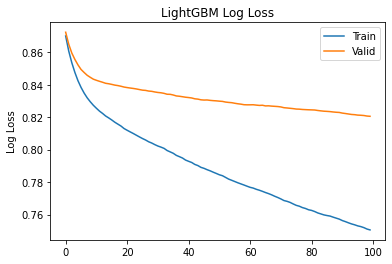

[[0.01775752 0.08553812 0.89670436]
 [0.08170239 0.46037113 0.45792648]
 [0.08901956 0.34512808 0.56585237]
 ...
 [0.01761552 0.14446319 0.83792129]
 [0.03205342 0.11751986 0.85042672]
 [0.05391701 0.58170366 0.36437933]]
      index         0         1         2
0     26457  0.017758  0.085538  0.896704
1     26458  0.081702  0.460371  0.457926
2     26459  0.089020  0.345128  0.565852
3     26460  0.029221  0.185554  0.785225
4     26461  0.040209  0.377607  0.582184
...     ...       ...       ...       ...
9995  36452  0.072060  0.373248  0.554692
9996  36453  0.037910  0.213722  0.748368
9997  36454  0.017616  0.144463  0.837921
9998  36455  0.032053  0.117520  0.850427
9999  36456  0.053917  0.581704  0.364379

[10000 rows x 4 columns]


0.820559812128439

In [35]:
eval_lgbm(X, y, test)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: loss
[1]	training's multi_logloss: 1.04702	valid_1's multi_logloss: 1.0479
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 1.03094	valid_1's multi_logloss: 1.03263
[3]	training's multi_logloss: 1.01737	valid_1's multi_logloss: 1.0198
[4]	training's multi_logloss: 1.00537	valid_1's multi_logloss: 1.00863
[5]	training's multi_logloss: 0.994752	valid_1's multi_logloss: 0.998771
[6]	training's multi_logloss: 0.982927	valid_1's multi_logloss: 0.988211
[7]	training's multi_logloss: 0.973238	valid_1's multi_logloss: 0.979761
[8]	training's multi_logloss: 0.963701	valid_1's multi_logloss: 0.971201
[9]	training's multi_logloss: 0.956671	valid_1's multi_logloss: 0.965115
[10]	training's multi_logloss: 0.948781	valid_1's multi_logloss: 0.957965
[11]	training's multi_logloss: 0.940319	valid_1's multi_l

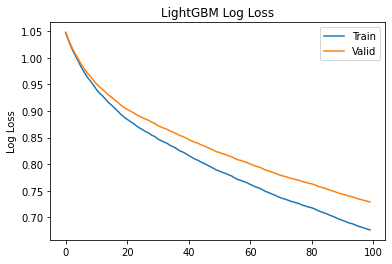

[[0.34949812 0.28527931 0.36522257]
 [0.16458999 0.75536796 0.08004205]
 [0.16035629 0.83630003 0.00334368]
 ...
 [0.09600591 0.82686352 0.07713057]
 [0.08447684 0.56023503 0.35528813]
 [0.02910655 0.96961224 0.00128121]]
      index         0         1         2
0     26457  0.349498  0.285279  0.365223
1     26458  0.164590  0.755368  0.080042
2     26459  0.160356  0.836300  0.003344
3     26460  0.139059  0.564638  0.296304
4     26461  0.133718  0.827354  0.038928
...     ...       ...       ...       ...
9995  36452  0.239795  0.720523  0.039682
9996  36453  0.150892  0.745006  0.104102
9997  36454  0.096006  0.826864  0.077131
9998  36455  0.084477  0.560235  0.355288
9999  36456  0.029107  0.969612  0.001281

[10000 rows x 4 columns]


0.7286537952329682

In [36]:
eval_lgbm(X_res_smenn, y_res_smenn, test)

In [40]:
#from sklearn.metrics import accuracy_score, log_loss
#from sklearn.metrics import f1_score
#from tensorflow.keras.utils import to_categorical

#def log_loss_(X, y, test):
#    X_train, X_val, y_train, y_val = train_test_split(X, y, 
#                                                    stratify=y, test_size=0.25,
#                                                    random_state = SEED)
    
#    lgbm = LGBMClassifier(random_state=SEED)
#    lgbm.fit(X_train, y_train)
#    y_pred=lgbm.predict_proba(X_val)
#    log_loss_value = log_loss(to_categorical(y_val['credit']), y_pred)
    
#    y_pred_submit= lgbm.predict_proba(test)
    #y_pred_submit_df=pd.DataFrame(y_pred_submit)
#    print(y_pred_submit)
    
#    submission = pd.read_csv(BASE_DIR + 'sample_submission.csv')
#    submission.loc[:,1:]= y_pred_submit
    
#    submission.to_csv('My Submission.csv', index=False)
#    print(submission)
    
#    return log_loss_value

In [41]:
#def log_loss_xgb(X, y, test):
#    X_train, X_val, y_train, y_val = train_test_split(X, y, 
#                                                    stratify=y, test_size=0.25,
#                                                    random_state = SEED)
    
#    xgb = XGBClassifier(random_state=SEED)
#    xgb.fit(X_train, y_train)
#    y_pred=xgb.predict_proba(X_val)
#    log_loss_value = log_loss(to_categorical(y_val['credit']), y_pred)
    
#    y_pred_submit= xgb.predict_proba(test)
    #y_pred_submit_df=pd.DataFrame(y_pred_submit)
    #print(y_pred_submit)
    
#    submission = pd.read_csv(BASE_DIR + 'sample_submission.csv')
#    submission.loc[:,1:]= y_pred_submit
    
#    submission.to_csv('My Submission.csv', index=False)
    #print(submission)
    
#    return log_loss_value

샘플링 전의 log loss
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: loss
[1]	training's multi_logloss: 0.864389	valid_1's multi_logloss: 0.866654
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 0.851385	valid_1's multi_logloss: 0.855063
[3]	training's multi_logloss: 0.84144	valid_1's multi_logloss: 0.846646
[4]	training's multi_logloss: 0.833803	valid_1's multi_logloss: 0.840169
[5]	training's multi_logloss: 0.827134	valid_1's multi_logloss: 0.83477
[6]	training's multi_logloss: 0.821621	valid_1's multi_logloss: 0.830471
[7]	training's multi_logloss: 0.81706	valid_1's multi_logloss: 0.827075
[8]	training's multi_logloss: 0.812989	valid_1's multi_logloss: 0.824164
[9]	training's multi_logloss: 0.809548	valid_1's multi_logloss: 0.821775
[10]	training's multi_logloss: 0.806292	valid_1's multi_logloss: 0.81961
[11]	training's multi_logloss: 0.80

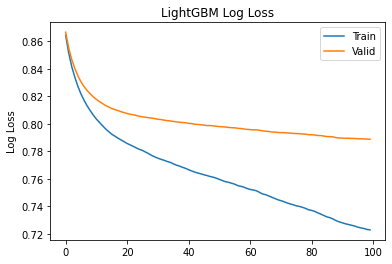

[[0.06904446 0.12875389 0.80220165]
 [0.13620665 0.16409076 0.69970259]
 [0.11213608 0.17292259 0.71494133]
 ...
 [0.02784169 0.0992456  0.87291272]
 [0.11605161 0.14400969 0.7399387 ]
 [0.05603258 0.23019575 0.71377166]]
      index         0         1         2
0     26457  0.069044  0.128754  0.802202
1     26458  0.136207  0.164091  0.699703
2     26459  0.112136  0.172923  0.714941
3     26460  0.127976  0.135926  0.736098
4     26461  0.098943  0.179965  0.721092
...     ...       ...       ...       ...
9995  36452  0.130741  0.185688  0.683571
9996  36453  0.084995  0.259758  0.655247
9997  36454  0.027842  0.099246  0.872913
9998  36455  0.116052  0.144010  0.739939
9999  36456  0.056033  0.230196  0.713772

[10000 rows x 4 columns]
- =============================================No Sampling=============================================: 0.7887
샘플링 후의 log loss 값들
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[L

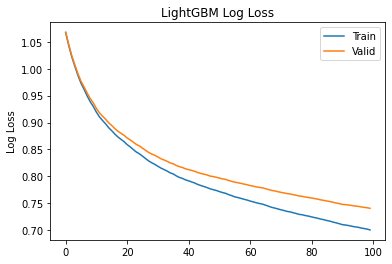

[[0.15086642 0.15507123 0.69406235]
 [0.15726128 0.16814716 0.67459156]
 [0.22264168 0.17691547 0.60044284]
 ...
 [0.08949415 0.2037041  0.70680176]
 [0.19827253 0.1722711  0.62945638]
 [0.18863076 0.19720135 0.61416789]]
      index         0         1         2
0     26457  0.150866  0.155071  0.694062
1     26458  0.157261  0.168147  0.674592
2     26459  0.222642  0.176915  0.600443
3     26460  0.189835  0.157982  0.652183
4     26461  0.127324  0.119678  0.752997
...     ...       ...       ...       ...
9995  36452  0.159011  0.225881  0.615109
9996  36453  0.158728  0.220689  0.620583
9997  36454  0.089494  0.203704  0.706802
9998  36455  0.198273  0.172271  0.629456
9999  36456  0.188631  0.197201  0.614168

[10000 rows x 4 columns]
- =============================================Smote=============================================:  0.7407
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unkno

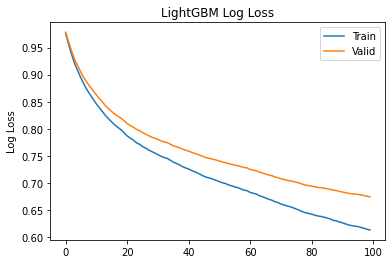

[[0.3181106  0.06547908 0.61641032]
 [0.34017262 0.1425194  0.51730797]
 [0.23707807 0.24019304 0.52272889]
 ...
 [0.10433776 0.30384446 0.59181777]
 [0.37910423 0.22121807 0.39967771]
 [0.25384618 0.33289912 0.4132547 ]]
      index         0         1         2
0     26457  0.318111  0.065479  0.616410
1     26458  0.340173  0.142519  0.517308
2     26459  0.237078  0.240193  0.522729
3     26460  0.373215  0.202607  0.424178
4     26461  0.403761  0.158108  0.438131
...     ...       ...       ...       ...
9995  36452  0.398662  0.306413  0.294925
9996  36453  0.257200  0.362942  0.379858
9997  36454  0.104338  0.303844  0.591818
9998  36455  0.379104  0.221218  0.399678
9999  36456  0.253846  0.332899  0.413255

[10000 rows x 4 columns]
- =============================================Smote_ENN=============================================:  0.6744
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] U

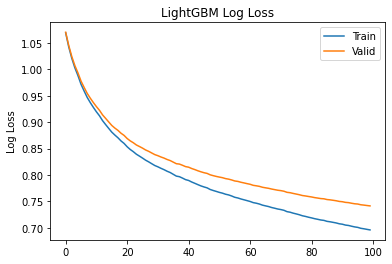

[[0.13378401 0.15604563 0.71017036]
 [0.15146884 0.13556948 0.71296168]
 [0.21257573 0.1764477  0.61097656]
 ...
 [0.08573866 0.14535826 0.76890308]
 [0.18478367 0.18275255 0.63246379]
 [0.15567236 0.23715611 0.60717153]]
      index         0         1         2
0     26457  0.133784  0.156046  0.710170
1     26458  0.151469  0.135569  0.712962
2     26459  0.212576  0.176448  0.610977
3     26460  0.205489  0.145458  0.649052
4     26461  0.149155  0.148352  0.702494
...     ...       ...       ...       ...
9995  36452  0.191467  0.253130  0.555403
9996  36453  0.176744  0.239753  0.583503
9997  36454  0.085739  0.145358  0.768903
9998  36455  0.184784  0.182753  0.632464
9999  36456  0.155672  0.237156  0.607172

[10000 rows x 4 columns]
- =============================================Smote_TOMEK=============================================:  0.7414


In [38]:
print('샘플링 전의 log loss')
print('- =============================================No Sampling=============================================:'
      ,round(eval_lgbm(X, y, test),4))

print('샘플링 후의 log loss 값들')
print('- =============================================Smote=============================================: '
      ,round(eval_lgbm(X_res_sm, y_res_sm, test),4))
print('- =============================================Smote_ENN=============================================: '
      ,round(eval_lgbm(X_res_smenn, y_res_smenn, test),4))
print('- =============================================Smote_TOMEK=============================================: '
      ,round(eval_lgbm(X_res_smtk, y_res_smtk, test),4))

In [43]:
print('샘플링 전의 log loss')
#print('- No Sampling:',round(log_loss_xgb(X, y, test),4))

print('샘플링 후의 log loss 값들')
#print('- Smote: ',round(log_loss_xgb(X_res_sm, y_res_sm, test),4))
#print('- Smote_ENN: ',round(log_loss_xgb(X_res_smenn, y_res_smenn, test),4))
#print('- Smote_TOMEK: ',round(log_loss_xgb(X_res_smtk, y_res_smtk, test),4))

샘플링 전의 log loss
샘플링 후의 log loss 값들
[00:55:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
- Smote_ENN:  0.5527
